In [13]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('clustering.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


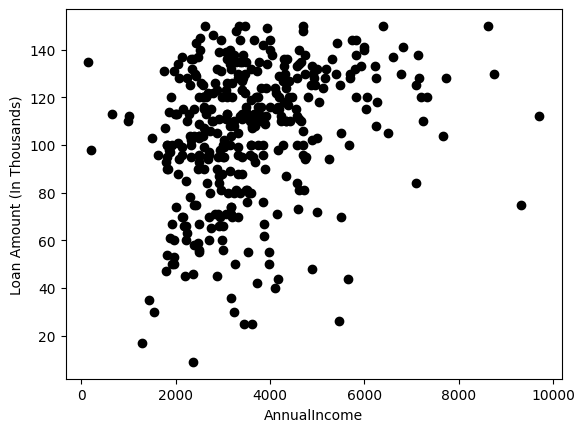

In [15]:
x = data[["LoanAmount","ApplicantIncome"]]
plt.scatter(x["ApplicantIncome"],x["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

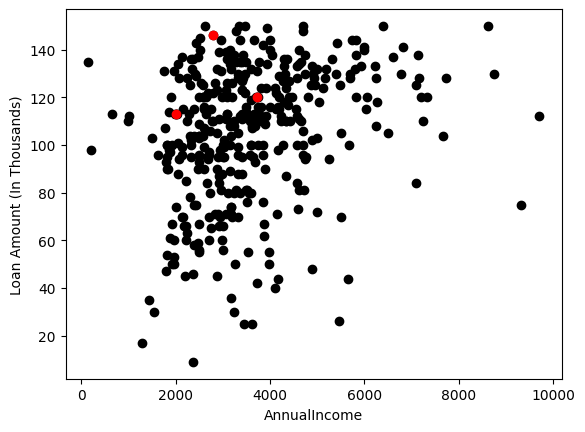

In [16]:
K=3
Centroids = (x.sample(n=K))
plt.scatter(x["ApplicantIncome"],x["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [17]:
diff = 1
j=0

while(diff!=0):
    XD=x
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        x[i]=ED
        i=i+1

    C=[]
    for index,row in x.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    x["Cluster"]=C
    Centroids_new = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = x.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

605.6372002639399
560.7286339394029
443.3098830781326
408.6214806964527
215.94836106251185
212.11585654878053
320.86544014225217
235.63273762230665
248.74878646215663
125.16501318300665
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


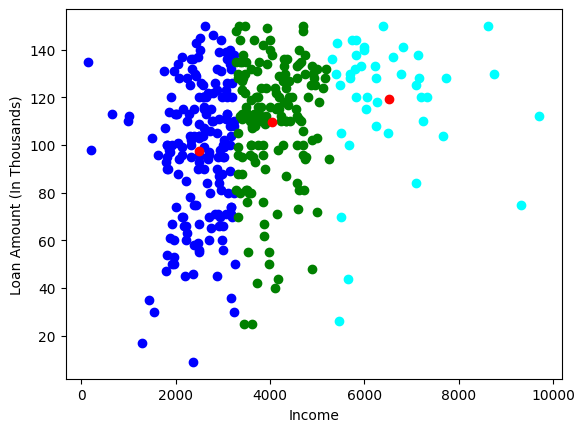

In [18]:
color=['blue','green','cyan']
for k in range(K):
    data=x[x["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()